# **Imported Librarys**

In [261]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.python import tf2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
import numpy as np
import tensorflow
import pandas as pd
import os
import collections
import re
import string
import keras
import nltk
import nltk
nltk.download('punkt')
from gensim import models

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Reading Data from Directory**

In [ ]:
data = pd.read_csv('finaldatasett.TSV', error_bad_lines=False, header = None, delimiter='\t')

# **Dataset Labiling**

In [263]:
data.columns = ['Text', 'Label']

In [264]:
data.dropna()

,Text,Label
0,BARREEFFAMA KAMUU DUBISTEE BIRA KUTUUN GAARIIDHA.,2.0
1,Jabaadha ummata kenya gootota kenyaa.,1.0
2,Barrefama adda adda maalif hin garsiftan.,2.0
3,Sagaleen sirrii hin jiruu.,2.0
4,WBO waliin dhaabanne Mootummaa kana Ofirraa ka...,0.0
...,...,...
2461,Muslimni masgiidatti hiriira bahe rabbi haa ka...,1.0
2462,Jabbadhaa dhugaan nii turtii malee hin haftuu.,2.0
2463,Bakka dhimmi illaallatu dhiistanii magaalaa ke...,2.0
2464,Jabadhaa jajjabee koo.,2.0


In [265]:
data.Label.unique()
data=data.dropna()
data.Label.unique()

array([2., 1., 0.])

In [266]:
data.shape

(2410, 2)

In [267]:
data.Label.value_counts()

0.0    1234
1.0     645
2.0     531
Name: Label, dtype: int64

# **Removing Punctuation Marks**

In [268]:
def stripPunc(wordList):
    """Strips punctuation from list of words"""
    puncList = [".",";",":","!","?","/","\\",",","#","@","$","&",")","(","\""]
    for punc in puncList:
        for word in wordList:
            wordList=[word.replace(punc,'') for word in wordList]
    return wordList

In [269]:
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

data['Text_Clean'] = data['Text'].apply(lambda x: remove_punct(x))

# #**Tokenization**

In [270]:
from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in data.Text_Clean] 

# **Lower case Conversion**

In [271]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens] 
data['tokens']=lower_tokens

# **#StopWord Removal**

In [272]:
with open("AfaanOromoStopwords.csv",encoding ='unicode_escape') as f:
   stoplist=f.read().strip().split(',')

In [273]:
variable=data['tokens'].tolist()

In [274]:
def remove_stop_words(tokens): 
    return [word for word in tokens if word not in stoplist]

In [275]:
f=[remove_stop_words(sen) for sen in variable]
result=[' '.join(sen) for sen in f]
data['Text_Final']=result

In [276]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens]
result = [' '.join(sen) for sen in filtered_words] 
data['Text_Final'] = result

In [277]:
data

,Text,Label,Text_Clean,tokens,Text_Final
0,BARREEFFAMA KAMUU DUBISTEE BIRA KUTUUN GAARIIDHA.,2.0,BARREEFFAMA KAMUU DUBISTEE BIRA KUTUUN GAARIIDHA,"[barreeffama, kamuu, dubistee, bira, kutuun, g...",barreeffama kamuu dubistee kutuun gaariidha
1,Jabaadha ummata kenya gootota kenyaa.,1.0,Jabaadha ummata kenya gootota kenyaa,"[jabaadha, ummata, kenya, gootota, kenyaa]",jabaadha ummata kenya gootota kenyaa
2,Barrefama adda adda maalif hin garsiftan.,2.0,Barrefama adda adda maalif hin garsiftan,"[barrefama, adda, adda, maalif, hin, garsiftan]",barrefama adda adda maalif hin garsiftan
3,Sagaleen sirrii hin jiruu.,2.0,Sagaleen sirrii hin jiruu,"[sagaleen, sirrii, hin, jiruu]",sagaleen sirrii hin jiruu
4,WBO waliin dhaabanne Mootummaa kana Ofirraa ka...,0.0,WBO waliin dhaabanne Mootummaa kana Ofirraa ka...,"[wbo, waliin, dhaabanne, mootummaa, kana, ofir...",wbo waliin dhaabanne mootummaa ofirraa kaasu q...
...,...,...,...,...,...
2461,Muslimni masgiidatti hiriira bahe rabbi haa ka...,1.0,Muslimni masgiidatti hiriira bahe rabbi haa ka...,"[muslimni, masgiidatti, hiriira, bahe, rabbi, ...",muslimni masgiidatti hiriira bahe rabbi kadhat...
2462,Jabbadhaa dhugaan nii turtii malee hin haftuu.,2.0,Jabbadhaa dhugaan nii turtii malee hin haftuu,"[jabbadhaa, dhugaan, nii, turtii, malee, hin, ...",jabbadhaa dhugaan nii turtii hin haftuu
2463,Bakka dhimmi illaallatu dhiistanii magaalaa ke...,2.0,Bakka dhimmi illaallatu dhiistanii magaalaa ke...,"[bakka, dhimmi, illaallatu, dhiistanii, magaal...",bakka dhimmi illaallatu dhiistanii magaalaa ci...
2464,Jabadhaa jajjabee koo.,2.0,Jabadhaa jajjabee koo,"[jabadhaa, jajjabee, koo]",jabadhaa jajjabee


# **Assigning class for the dataset**

In [278]:
anti = []
ext = []
neu = []
for l in data.Label:
    if l == 0:
        anti.append(0)
        ext.append(1)
        neu.append(0)
    elif l == 1:
        anti.append(1)
        ext.append(0)
        neu.append(0)
    elif l == 2:
        neu.append(1)
        anti.append(0)
        ext.append(0)

In [279]:
data['Anti_Extreme']= anti
data['Exterem']= ext
data['Neutral']= neu

In [280]:
data.head()

,Text,Label,Text_Clean,tokens,Text_Final,Anti_Extreme,Exterem,Neutral
0,BARREEFFAMA KAMUU DUBISTEE BIRA KUTUUN GAARIIDHA.,2.0,BARREEFFAMA KAMUU DUBISTEE BIRA KUTUUN GAARIIDHA,"[barreeffama, kamuu, dubistee, bira, kutuun, g...",barreeffama kamuu dubistee kutuun gaariidha,0,0,1
1,Jabaadha ummata kenya gootota kenyaa.,1.0,Jabaadha ummata kenya gootota kenyaa,"[jabaadha, ummata, kenya, gootota, kenyaa]",jabaadha ummata kenya gootota kenyaa,1,0,0
2,Barrefama adda adda maalif hin garsiftan.,2.0,Barrefama adda adda maalif hin garsiftan,"[barrefama, adda, adda, maalif, hin, garsiftan]",barrefama adda adda maalif hin garsiftan,0,0,1
3,Sagaleen sirrii hin jiruu.,2.0,Sagaleen sirrii hin jiruu,"[sagaleen, sirrii, hin, jiruu]",sagaleen sirrii hin jiruu,0,0,1
4,WBO waliin dhaabanne Mootummaa kana Ofirraa ka...,0.0,WBO waliin dhaabanne Mootummaa kana Ofirraa ka...,"[wbo, waliin, dhaabanne, mootummaa, kana, ofir...",wbo waliin dhaabanne mootummaa ofirraa kaasu q...,0,1,0


In [281]:
data['tokens'] = filtered_words
data = data[['Text_Final', 'tokens', 'Label', 'Anti_Extreme', 'Exterem', 'Neutral']]
data[:20]

,Text_Final,tokens,Label,Anti_Extreme,Exterem,Neutral
0,barreeffama kamuu dubistee kutuun gaariidha,"[barreeffama, kamuu, dubistee, kutuun, gaariidha]",2.0,0,0,1
1,jabaadha ummata kenya gootota kenyaa,"[jabaadha, ummata, kenya, gootota, kenyaa]",1.0,1,0,0
2,barrefama adda adda maalif hin garsiftan,"[barrefama, adda, adda, maalif, hin, garsiftan]",2.0,0,0,1
3,sagaleen sirrii hin jiruu,"[sagaleen, sirrii, hin, jiruu]",2.0,0,0,1
4,wbo waliin dhaabanne mootummaa ofirraa kaasu q...,"[wbo, waliin, dhaabanne, mootummaa, ofirraa, k...",0.0,0,1,0
5,jabaadha abdii hin kutinaa rabbii jiraa,"[jabaadha, abdii, hin, kutinaa, rabbii, jiraa]",1.0,1,0,0
6,abo abiyyi ahimad malitti nafxanyaa dha male,"[abo, abiyyi, ahimad, malitti, nafxanyaa, dha,...",0.0,0,1,0
7,jabaadha ummatta keenyaaf sagalee tanuf,"[jabaadha, ummatta, keenyaaf, sagalee, tanuf]",2.0,0,0,1
8,rabbii issin biraa jiratuu oromoo yommiyu,"[rabbii, issin, biraa, jiratuu, oromoo, yommiyu]",1.0,1,0,0
9,konkkoolataa keessaa bayyaa kaa,"[konkkoolataa, keessaa, bayyaa, kaa]",2.0,0,0,1


# **Word Embedding #Word2Vec**

In [282]:
X=list(data['tokens'])

In [283]:
from gensim.models import Word2Vec
emb=Word2Vec(X,size=100,min_count=1)

In [284]:
len(emb.wv.vocab)

6467

In [285]:
emb.wv.vocab

{'barreeffama': <gensim.models.keyedvectors.Vocab at 0x7f8e65044650>,
 'kamuu': <gensim.models.keyedvectors.Vocab at 0x7f8e557cb490>,
 'dubistee': <gensim.models.keyedvectors.Vocab at 0x7f8e65052e50>,
 'kutuun': <gensim.models.keyedvectors.Vocab at 0x7f8e65052cd0>,
 'gaariidha': <gensim.models.keyedvectors.Vocab at 0x7f8e65052510>,
 'jabaadha': <gensim.models.keyedvectors.Vocab at 0x7f8e65052850>,
 'ummata': <gensim.models.keyedvectors.Vocab at 0x7f8e65052b90>,
 'kenya': <gensim.models.keyedvectors.Vocab at 0x7f8e65052b50>,
 'gootota': <gensim.models.keyedvectors.Vocab at 0x7f8e65052150>,
 'kenyaa': <gensim.models.keyedvectors.Vocab at 0x7f8e65052c50>,
 'barrefama': <gensim.models.keyedvectors.Vocab at 0x7f8e65052d90>,
 'adda': <gensim.models.keyedvectors.Vocab at 0x7f8e6504f210>,
 'maalif': <gensim.models.keyedvectors.Vocab at 0x7f8e6504f550>,
 'hin': <gensim.models.keyedvectors.Vocab at 0x7f8e6504f2d0>,
 'garsiftan': <gensim.models.keyedvectors.Vocab at 0x7f8e6504fd10>,
 'sagaleen': 

In [286]:
emb.wv.most_similar('itoophiyaa')

[('hin', 0.7855319976806641),
 ('oromoo', 0.7805348634719849),
 ('jira', 0.7739956378936768),
 ('ni', 0.7589368224143982),
 ('tokko', 0.7501821517944336),
 ('wbo', 0.7462140321731567),
 ('oromo', 0.7438040375709534),
 ('nama', 0.734398603439331),
 ('biyyaa', 0.731334388256073),
 ('kenyaa', 0.7312307357788086)]

# **Spliting Dataset Into Trainign And Testing**

In [287]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [288]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

17499 words total, with a vocabulary size of 5827
Max sentence length is 37


In [289]:
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

4431 words total, with a vocabulary size of 2444
Max sentence length is 42


In [290]:
from gensim import models

In [291]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [292]:
emb.wv.most_similar('oromoo')

[('hin', 0.9515320062637329),
 ('oromoon', 0.9030275344848633),
 ('jira', 0.8922939300537109),
 ('wbo', 0.8897060751914978),
 ('ni', 0.8861595988273621),
 ('jiru', 0.8768099546432495),
 ('oromo', 0.8755456209182739),
 ('nama', 0.8695470094680786),
 ('qaba', 0.8691385388374329),
 ('biyyaa', 0.8677172064781189)]

In [ ]:
training_embeddings = get_word2vec_embeddings(emb, data_train, generate_missing=True)

In [294]:
MAX_SEQUENCE_LENGTH = 40
EMBEDDING_DIM = 100

In [295]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 5827 unique tokens.


In [296]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = emb[word] if word in emb else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

In [298]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# **Convolutional Neural Network Model**

In [299]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=True)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4,5,6]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.2)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [300]:
label_names = ['Anti_Extreme', 'Exterem', 'Neutral']
y_train = data_train[label_names].values
x_train = train_cnn_data
y_tr = y_train
y_test = data_test[label_names].values

In [301]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 40, 100)      582800      ['input_6[0][0]']                
                                                                                                  
 conv1d_25 (Conv1D)             (None, 39, 200)      40200       ['embedding_5[0][0]']            
                                                                                                  
 conv1d_26 (Conv1D)             (None, 38, 200)      60200       ['embedding_5[0][0]']            
                                                                                            

In [302]:
num_epochs = 10
batch_size = 68

In [303]:
hist = model.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2, shuffle=True, batch_size=batch_size)

Epoch 1/10
23/23 [==============================] - 5s 188ms/step - loss: 0.6141 - acc: 0.5071 - val_loss: 0.5707 - val_acc: 0.4948
Epoch 2/10
23/23 [==============================] - 4s 179ms/step - loss: 0.4669 - acc: 0.6154 - val_loss: 0.4562 - val_acc: 0.6321
Epoch 3/10
23/23 [==============================] - 4s 179ms/step - loss: 0.2782 - acc: 0.7873 - val_loss: 0.4953 - val_acc: 0.7306
Epoch 4/10
23/23 [==============================] - 4s 184ms/step - loss: 0.1362 - acc: 0.9598 - val_loss: 0.4210 - val_acc: 0.8031
Epoch 5/10
23/23 [==============================] - 4s 182ms/step - loss: 0.0285 - acc: 0.9883 - val_loss: 0.4663 - val_acc: 0.7824
Epoch 6/10
23/23 [==============================] - 4s 182ms/step - loss: 0.0087 - acc: 0.9974 - val_loss: 0.4947 - val_acc: 0.7902
Epoch 7/10
23/23 [==============================] - 4s 187ms/step - loss: 0.0068 - acc: 0.9974 - val_loss: 0.5012 - val_acc: 0.7953
Epoch 8/10
23/23 [==============================] - 4s 184ms/step - loss: 0.

In [304]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)

1/1 [==============================] - 0s 369ms/step


In [305]:
labels = [1, 0,2]

In [306]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

# **Accuracy Of the model**

In [307]:
sum(data_test.Label==prediction_labels)/len(prediction_labels)

0.8008298755186722

In [308]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_cnn_data)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
conf_mat

array([[103,   7,  15],
       [ 17, 219,  22],
       [ 23,  12,  64]])

# **Precision, Recall f1-score of the model**

In [309]:
from sklearn.metrics import classification_report
y_pred = model.predict(test_cnn_data)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       125
           1       0.92      0.85      0.88       258
           2       0.63      0.65      0.64        99

    accuracy                           0.80       482
   macro avg       0.76      0.77      0.76       482
weighted avg       0.81      0.80      0.80       482



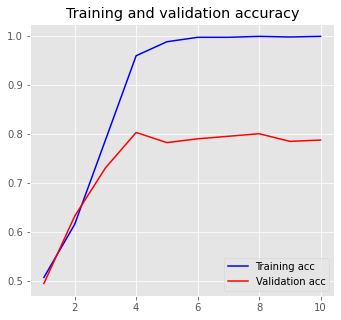

In [310]:
import matplotlib.pyplot as plt 
 
plt.style.use('ggplot') 
 
def plot_history(history): 
    acc = history.history['acc'] 
    val_acc = history.history['val_acc'] 
    x = range(1, len(acc) + 1) 
 
    plt.figure(figsize=(12, 5)) 
    plt.subplot(1, 2, 1) 
    plt.plot(x, acc, 'b', label='Training acc') 
    plt.plot(x, val_acc, 'r', label='Validation acc') 
    plt.title('Training and validation accuracy') 
    plt.legend() 
    plt.legend() 
 
%matplotlib inline 
plot_history(hist)

In [ ]:
import matplotlib.pyplot as plt 
 
plt.style.use('ggplot') 
 
def plot_history(history): 
    acc = history.history['acc'] 
    val_acc = history.history['val_acc'] 
    loss = history.history['loss'] 
    val_loss = history.history['val_loss'] 
    x = range(1, len(acc) + 1) 
 
    plt.figure(figsize=(12, 5)) 
    plt.subplot(1, 2, 1) 
    plt.plot(x, acc, 'b', label='Training acc') 
    plt.plot(x, val_acc, 'r', label='Validation acc') 
    plt.title('Training and validation accuracy') 
    plt.legend() 
    plt.subplot(1, 2, 2) 
    plt.plot(x, loss, 'b', label='Training loss') 
    plt.plot(x, val_loss, 'r', label='Validation loss') 
    plt.title('Training and validation loss') 
    plt.legend() 
 
%matplotlib inline 
plot_history(hist)

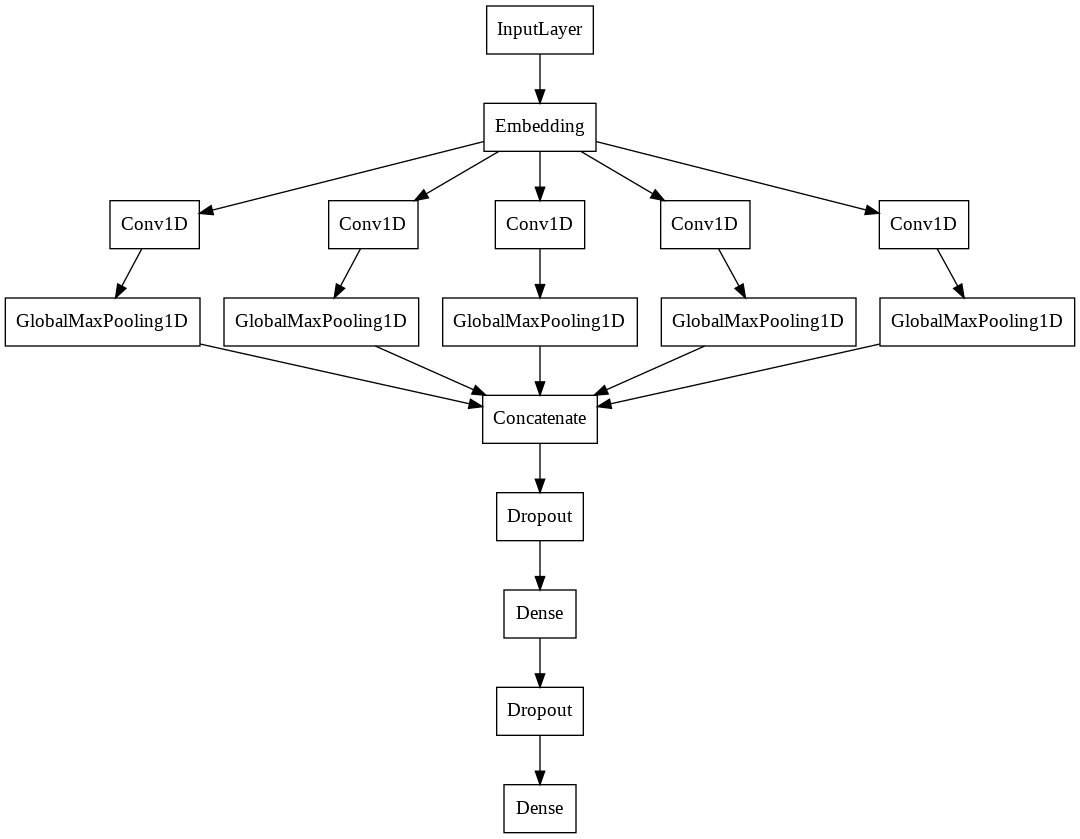

In [312]:
#pip install -q pydot
from keras .utils.vis_utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=False, show_layer_names=False)